### Importación de datos



In [5]:
#Importacion de librerias
import pandas as pd
import matplotlib.pyplot as plt




url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda01 = pd.read_csv(url)
tienda02 = pd.read_csv(url2)
tienda03 = pd.read_csv(url3)
tienda04 = pd.read_csv(url4)

tienda01.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [6]:
#definicion de tiendas en data frames

tienda01['Tienda'] = 'Tienda_1'
tienda02['Tienda'] = 'Tienda_2'
tienda03['Tienda'] = 'Tienda_3'
tienda04['Tienda'] = 'Tienda_4'

#concatenado de data frames

df = pd.concat([tienda01, tienda02, tienda03, tienda04], ignore_index=True)
df



,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda_1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda_1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda_1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda_1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de comedor,Muebles,227700.0,12600.0,12/02/2020,Camila Rivera,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359,Tienda_4
9431,Silla de oficina,Muebles,342000.0,18600.0,17/05/2022,Felipe Santos,Bucaramanga,5,Tarjeta de crédito,3,7.12539,-73.11980,Tienda_4
9432,Vaso térmico,Deportes y diversión,36700.0,2400.0,03/05/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175,Tienda_4
9433,Set de ollas,Artículos para el hogar,151800.0,8300.0,15/06/2020,Blanca Ramirez,Cali,5,Tarjeta de crédito,1,3.43722,-76.52250,Tienda_4


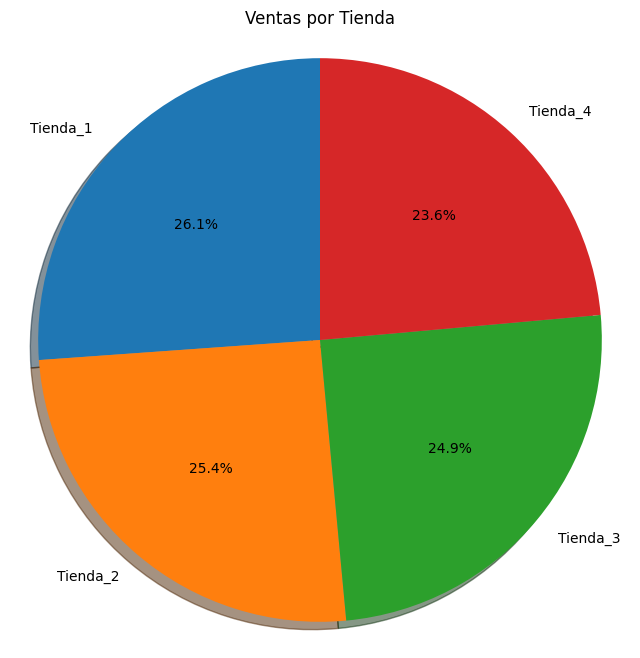

In [7]:
# total de ventas utilizando metodos de data frames
ventas_por_tienda = df.groupby('Tienda')['Precio'].sum()
ventas_por_tienda.map('{:,.1f}'.format)

# creacion gráfica tipo Pie de las ventas
plt.figure(figsize=(8, 8))
plt.pie(
    ventas_por_tienda,
    labels=ventas_por_tienda.index,
    autopct='%1.1f%%',  # Mostrar porcentaje con un decimal
    startangle=90,      # Girar la gráfica para mejor vista
    shadow=True         # Sombra para efecto visual
)
plt.title('Ventas por Tienda')
plt.axis('equal')  # Para que el pastel sea circular
plt.show()


# 2. Ventas por categoría

In [8]:

# suma de las ventas por tipo de producto y definicion
ventas_categoria = df.groupby(['Tienda', 'Categoría del Producto'])['Precio'].agg(['sum', 'count'])
ventas_categoria.rename(columns={'sum': 'Venta Categoria', 'count': 'Cantidad'}, inplace=True)
ventas_categoria


ventas_categoria_general = ventas_categoria.groupby('Categoría del Producto')[['Cantidad','Venta Categoria']].sum()
ventas_categoria_general['Venta Categoria'] = ventas_categoria_general['Venta Categoria'].map('{:.1f}'.format)
ventas_categoria_general




,Cantidad,Venta Categoria
Categoría del Producto,,
Artículos para el hogar,730,57579800.0
Deportes y diversión,1113,142977700.0
Electrodomésticos,1149,1324751100.0
Electrónicos,1772,1660576500.0
Instrumentos musicales,753,348772600.0
Juguetes,1290,73604400.0
Libros,742,37696100.0
Muebles,1886,757661000.0


# 3. Calificación promedio de la tienda


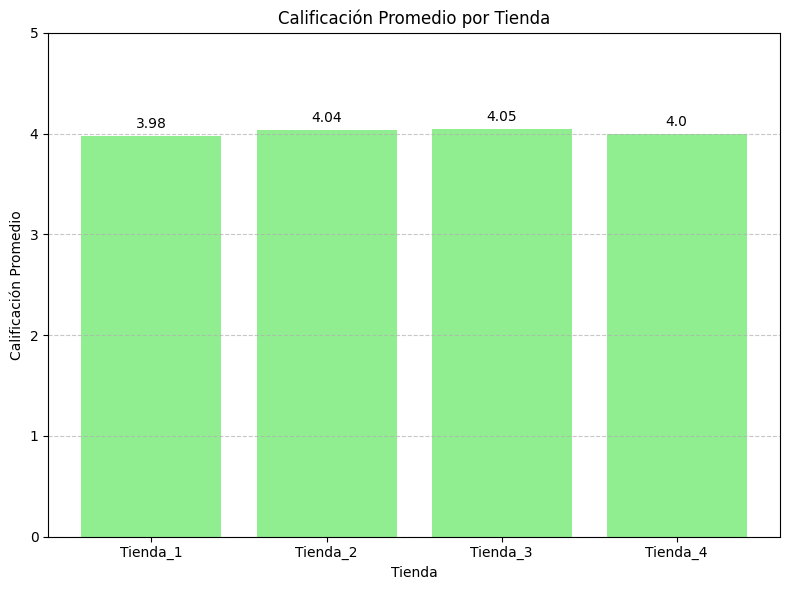

In [9]:
calificacion_promedio = round(df.groupby('Tienda')['Calificación'].mean(),2)
calificacion_promedio

plt.figure(figsize=(8, 6))
plt.bar(calificacion_promedio.index, calificacion_promedio.values, color='lightgreen')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio por Tienda')
plt.ylim(0, 5)  # Rango de calificaciones (0 a 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valores encima de cada barra
for i, valor in enumerate(calificacion_promedio.values):
    plt.text(i, valor + 0.05, str(valor), ha='center', va='bottom')

plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [ ]:
# la candidad de productos
cantidad_productos = df.groupby('Tienda')['Producto'].value_counts().reset_index(name='count')

# maximo de productop
max_cantidad = cantidad_productos.groupby('Tienda')['count'].max().reset_index()

#union de data frams
productos_mas_vendidos = pd.merge(cantidad_productos, max_cantidad, on=['Tienda', 'count'])

productos_mas_vendidos.rename(columns={'count': 'Cantidad'}, inplace=True)
productos_mas_vendidos[['Tienda', 'Producto', 'Cantidad']]

,Tienda,Producto,Cantidad
0,Tienda_1,Armario,60
1,Tienda_1,Microondas,60
2,Tienda_1,TV LED UHD 4K,60
3,Tienda_2,Iniciando en programación,65
4,Tienda_3,Kit de bancas,57
5,Tienda_4,Cama box,62


In [ ]:
#minimos de producto
min_cantidad = cantidad_productos.groupby('Tienda')['count'].min().reset_index()

# union de data frmas
productos_menos_vendidos = pd.merge(cantidad_productos, min_cantidad, on=['Tienda', 'count'])


productos_menos_vendidos.rename(columns={'count': 'Cantidad'}, inplace=True)
productos_menos_vendidos[['Tienda', 'Producto', 'Cantidad']]

,Tienda,Producto,Cantidad
0,Tienda_1,Auriculares con micrófono,33
1,Tienda_1,Celular ABXY,33
2,Tienda_2,Juego de mesa,32
3,Tienda_3,Bloques de construcción,35
4,Tienda_4,Guitarra eléctrica,33


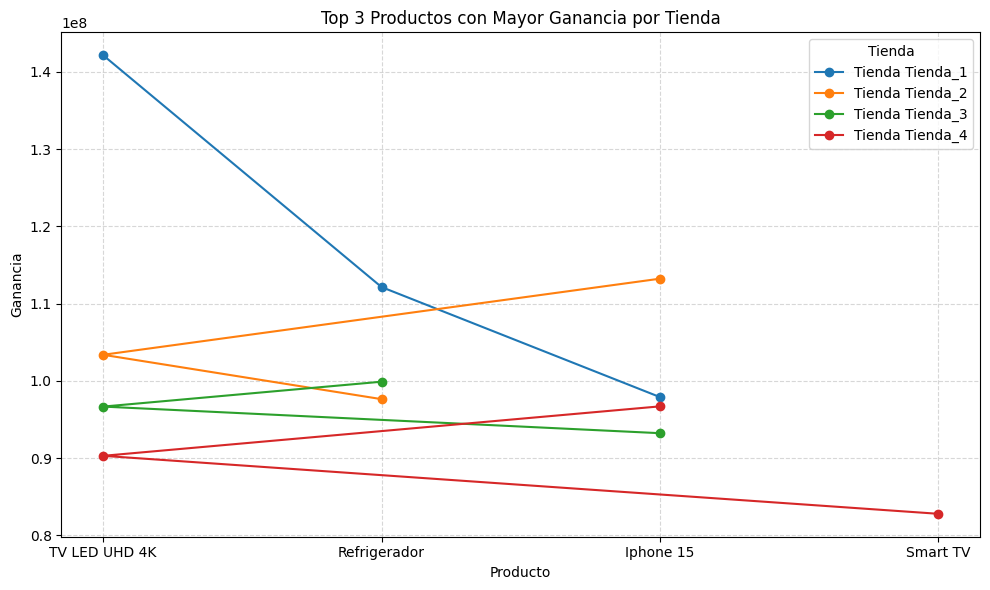

In [ ]:

#generacion de top 3 productos mas vendios

productos_tienda = df.groupby(['Tienda', 'Producto'])['Precio'].agg(['sum', 'count'])
productos_tienda = productos_tienda.sort_values(by='sum', ascending=False)
top3_productos_tienda = productos_tienda.groupby('Tienda', group_keys=True).head(3).sort_values(by='Tienda')
top3_productos_tienda.rename(columns={'sum': 'Ganancia', 'count': 'Cantidad'}, inplace=True)
top3_productos_tienda


# Aseguramos que los índices están bien organizados
top3_productos_tienda = top3_productos_tienda.reset_index()

# Creamos el gráfico de líneas
plt.figure(figsize=(10, 6))

# Para cada tienda, graficamos los 3 productos top
for tienda in top3_productos_tienda['Tienda'].unique():
    subset = top3_productos_tienda[top3_productos_tienda['Tienda'] == tienda]
    plt.plot(subset['Producto'], subset['Ganancia'], marker='o', label=f'Tienda {tienda}')

plt.title('Top 3 Productos con Mayor Ganancia por Tienda')
plt.xlabel('Producto')
plt.ylabel('Ganancia')
plt.legend(title='Tienda')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

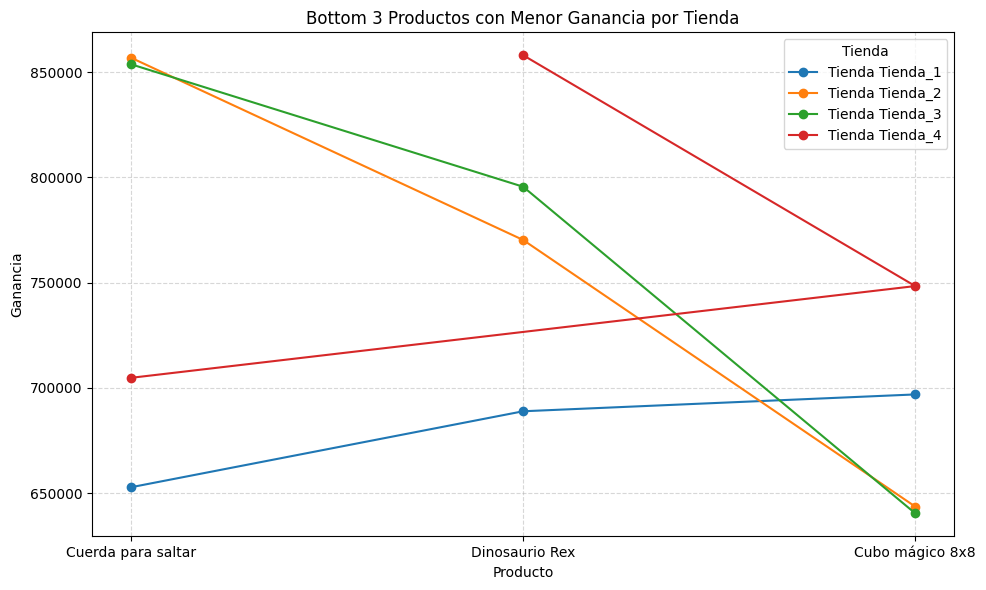

In [ ]:
#top 3 productos de menor margen

productos_tienda_menos = productos_tienda.sort_values(by='sum')
menos3_productos_tienda = productos_tienda_menos.groupby('Tienda', group_keys=True).head(3).sort_values(by='Tienda')
menos3_productos_tienda.rename(columns={'sum': 'Ganancia', 'count': 'Cantidad'}, inplace=True)
menos3_productos_tienda

menos3_productos_tienda = menos3_productos_tienda.reset_index()

plt.figure(figsize=(10, 6))
for tienda in menos3_productos_tienda['Tienda'].unique():
    subset = menos3_productos_tienda[menos3_productos_tienda['Tienda'] == tienda]
    plt.plot(subset['Producto'], subset['Ganancia'], marker='o', label=f'Tienda {tienda}')

plt.title('Bottom 3 Productos con Menor Ganancia por Tienda')
plt.xlabel('Producto')
plt.ylabel('Ganancia')
plt.legend(title='Tienda')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [ ]:

costo_envio_promedio = round(df.groupby('Tienda')['Costo de envío'].mean(),2)
costo_envio_promedio

,Costo de envío
Tienda,
Tienda_1,26018.61
Tienda_2,25216.24
Tienda_3,24805.68
Tienda_4,23459.46


# ***`Conclusiones.`***


# **1. Ventas de Tienda**

Para las ventas de las tiendas , genere un Grafico de "Píe" dando como resultado que la tienda con menos ventas es la numero 4 , ya que representa un 23.6%, lo que a nivel de ventas es la menos rentable

# **2.Top ventas**


✅ Los datos mostrados se llega a la conclusion que los productos esterella de las tiendas son los electonicos. Esto en el mundo contable puede justificar los costos de envio, ya que suelen ser mas pesados.


# **3.Clasificaciones de las tiendas**

✅ esta seccion genere un grafico de barras para ver el puntaje de cada tienda, para este caso se demuestra que la tienda 3 es la tienda con mayor puntaje y la tienda 1 con menor puntaje

# **4. Productos vendidos**

En esta seccion , se demuestra que los productos estella de las tiendas son los electronicos tales como tv smart, smartphones y relacionados. Sin embargo se demuesta el resultado del punto 1. La tienda 4 es la que menos vende de todas las tiendas.

# ***Conclusiones Finales y Recomendación***

Con el analisis de las graficas, se ha demostrado por sus resultados que la que menos vende es la tienda 4, sin embargo existen aristas a evaluar.


*   Mayor venta no siempre significa mayor ganancia
*   El rendimiento de las tiendas se muede medir conforme a sus ventas pero tambien pueden existir factores que se deberian evaluar.



En conclusion.

A nivel rendimiento contable y general , la tienda 4 es la menos rentable , por lo que, si se busca vender la que menos genera es la tienda 4. Sin embargo tal como comente los puntos pasados, el analisis de la data tambien nos muestra que tercera con mejor calificacion, por lo que puede que... de cierta forma solo alla que areglar un par de cosas para mejorar su rendimiento , en el mundo de los negocios existen ganancias fantasmas que a veces pueden mejorar el ingreso neto de una compañia, por lo la recomendacion seria generar una evaluacion de todos los puntos adicionales a los ya evaludados.
